<a href="https://colab.research.google.com/github/tukamilano/territory-game/blob/main/Territory_game_Convey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1ステップあたりに運搬できる量や運搬できるマス目に制限を加える場合どのような時が最適になるのだろうか

In [32]:
import random

def init_process(length, upper_time):
    assert length % 2 == 0
    threshold = int(length/2) #初めの負の値
    init_state = [random.randint(0, int(length/2)) for i in range(int(length/2))] + [-random.randint(0, int(length/2)) for i in range(int(length/2))]
    return init_state, threshold

def process1(state, threshold): #平等な場合
    end = False
    collide = state[threshold-1]+state[threshold]
    state = [0] + state[:threshold-1] + [collide] + state[threshold+1:]
    if 0 < collide:
        threshold += 1
    state = [x + 1 for x in state[:threshold-1]] + state[threshold-1:]

    if threshold == len(state):
        end = True
        return state, threshold, end

    collide = state[threshold-1]+state[threshold]
    state = state[:threshold-1] + [collide] + state[threshold+1:] + [0]
    if 0 > collide:
        threshold -= 1
    state = state[:threshold] + [x - 1 for x in state[threshold:]]

    if threshold == 0:
        end = True

    return state, threshold, end

def process2(state, threshold): #平等でない場合
    end = False
    collide = state[threshold-1]+state[threshold]
    state = [0] + state[:threshold-1] + [collide] + state[threshold+1:]
    if 0 < collide:
        threshold += 1

    if threshold == len(state):
        end = True
        return state, threshold, end

    collide = state[threshold-1]+state[threshold]
    state = state[:threshold-1] + [collide] + state[threshold+1:] + [0]
    if 0 > collide:
        threshold -= 1
    state = [x + 1 for x in state[:threshold]] + [x - 1 for x in state[threshold:]]

    if threshold == 0:
        end = True

    return state, threshold, end

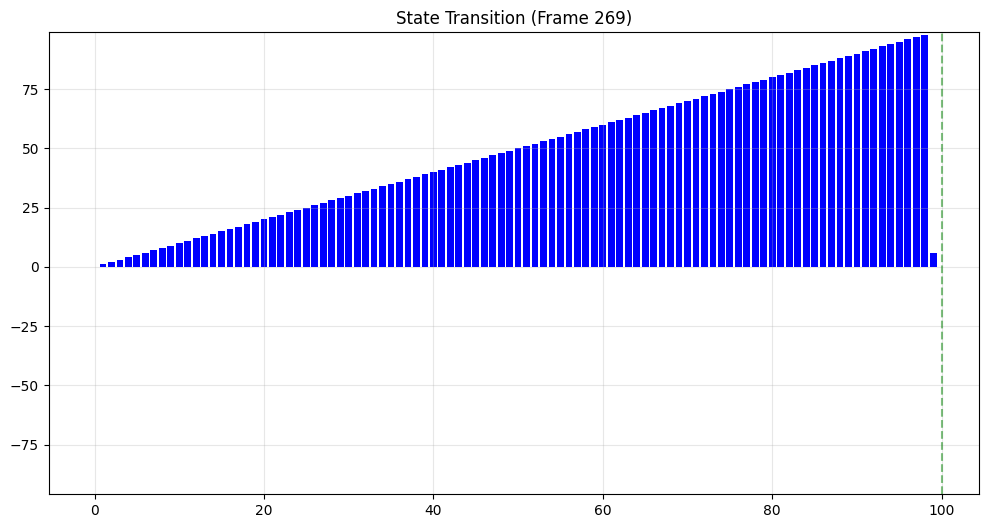

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# アニメーション用のデータを生成
def generate_data(length, upper_time):
    states = []
    thresholds = []

    state, threshold = init_process(length, upper_time)
    states.append(state.copy())
    thresholds.append(threshold)

    for t in range(upper_time):
        state, threshold, end = process2(state, threshold)
        states.append(state.copy())
        thresholds.append(threshold)
        if end:
            break

    return states, thresholds

# アニメーション作成
def create_animation(length=10, upper_time=100):
    states, thresholds = generate_data(length, upper_time)

    fig, ax = plt.subplots(figsize=(12, 6))

    def animate(frame):
        ax.clear()
        state = states[frame]
        threshold = thresholds[frame]

        # バーチャートの作成
        x = np.arange(len(state))
        colors = ['blue' if val >= 0 else 'red' for val in state]
        ax.bar(x, state, color=colors)

        # thresholdの位置に縦線を追加
        ax.axvline(x=threshold, color='green', linestyle='--', alpha=0.5)

        ax.set_ylim(min(min(s) for s in states) - 1, max(max(s) for s in states) + 1)
        ax.set_title(f'State Transition (Frame {frame})')
        ax.grid(True, alpha=0.3)

    anim = FuncAnimation(fig, animate, frames=len(states),
                        interval=100, repeat=False)

    return HTML(anim.to_jshtml())

# Colab上で実行
create_animation(length=100, upper_time=1000)